In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows',None)
th=pd.read_csv('/content/drive/MyDrive/Task5/Task5/takehome_users.csv',encoding='latin-1')
thue=pd.read_csv('/content/drive/MyDrive/Task5/Task5/takehome_user_engagement.csv',encoding='latin-1')
thue=pd.DataFrame([[np.nan,np.nan,np.nan],[np.nan,np.nan,np.nan],[np.nan,np.nan,np.nan]],columns=thue.columns).append(thue,ignore_index=True)
thue=pd.DataFrame(thue,columns=thue.columns).append([[np.nan,np.nan,np.nan],[np.nan,np.nan,np.nan],[np.nan,np.nan,np.nan]],ignore_index=True)
thue['time_stamp']=pd.to_datetime(thue['time_stamp'])
thue=thue.groupby(['user_id',thue['time_stamp'].dt.date])['visited'].sum().reset_index(name='visited')
thue['diff']=thue['time_stamp'].diff(periods=-1)
thue['diff_days']=(thue['diff']).dt.days
thue['diff_3days_sum']=thue['diff_days'].rolling(window=3).sum()
thg=thue[(thue['diff_3days_sum'] >= -7) & (thue['diff_3days_sum'] <=7)]
thg=thg.groupby(['user_id'])['visited'].count().reset_index(name='count_of_visited')
thg1=thg.merge(th,left_on='user_id',right_on='object_id')
#thg1.to_csv('/content/drive/MyDrive/Task5/Task5/adopted_user1.csv')



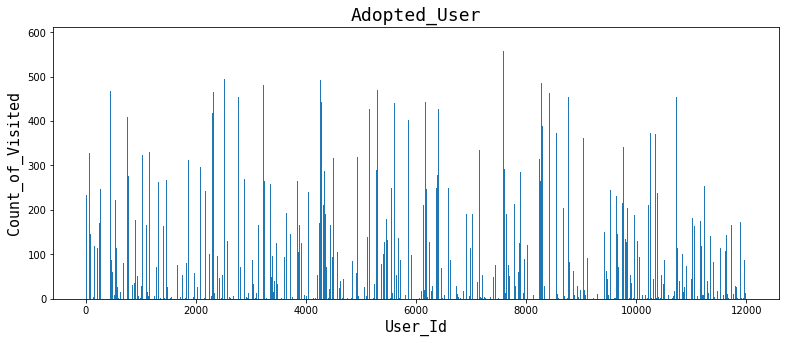

In [23]:
#plot
plt.figure(figsize=(13,5))
plt.bar(thg1['user_id'],thg1['count_of_visited'],width=4,align='center')
plt.xlabel('User_Id',fontsize=15, fontname='monospace')
plt.ylabel('Count_of_Visited',fontsize=15, fontname='monospace')
plt.title('Adopted_User',fontsize=18, fontname='monospace')
plt.show()

In [ ]:
thu=pd.read_csv('/content/drive/MyDrive/Task5/Task5/takehome_users.csv',encoding='latin-1')
thg1['result']='adopted_user'
thg2=thu.merge(thg1,on='object_id',how='left')
thg2.loc[thg2['result']!='adopted_user','result']='not_adopted_user'
thg2.drop(['creation_time_y', 'name_y', 'email_y', 'creation_source_y','last_session_creation_time_y', 'opted_in_to_mailing_list_y','enabled_for_marketing_drip_y', 'org_id_y', 'invited_by_user_id_y'],axis=1,inplace=True)



In [ ]:
domain=thg2.email_x.str.split('@',expand=True)[1]
thg2['domain']=domain

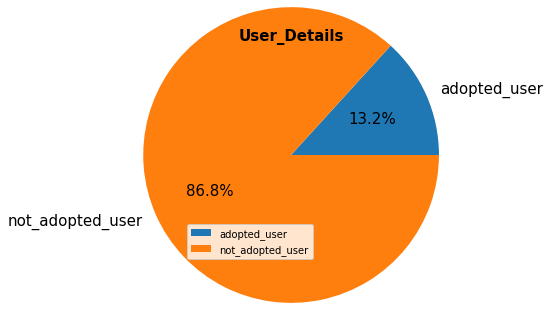

In [ ]:
fig,ax=plt.subplots()
thg3=thg2.groupby(['result'])['result'].count().reset_index(name='count_of_users')
textprops = {"fontsize":15}
ax.pie(thg3['count_of_users'],labels=thg3['result'],autopct='%1.1f%%',textprops =textprops,radius=1.7)
plt.title('User_Details', fontname="Times New Roman", size=15,fontweight="bold")
plt.legend()
plt.show()

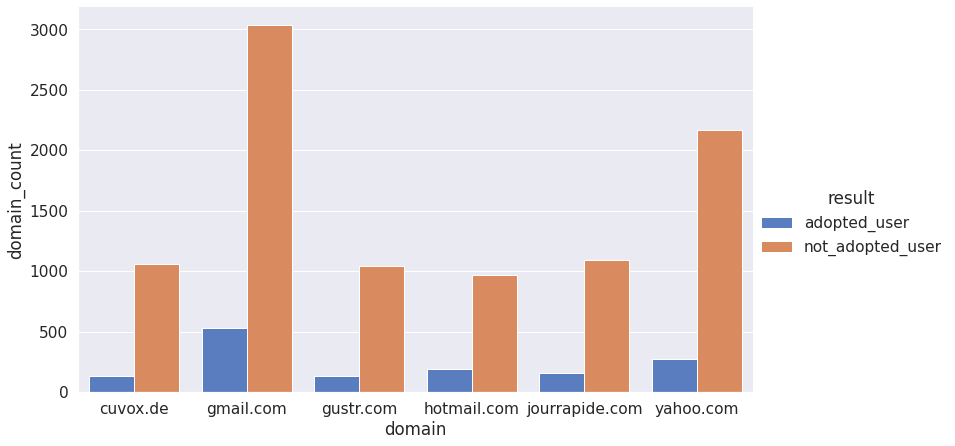

In [ ]:
thg5=thg2.groupby(['result','domain'])['domain'].count().reset_index(name='domain_count')
thg5=thg5[thg5['domain_count']>10]
sns.set(font_scale=1.4)
sns.catplot(x="domain", y="domain_count", hue="result", data=thg5, ci=None,
                height=6.5, kind="bar", palette="muted",aspect=1.7)


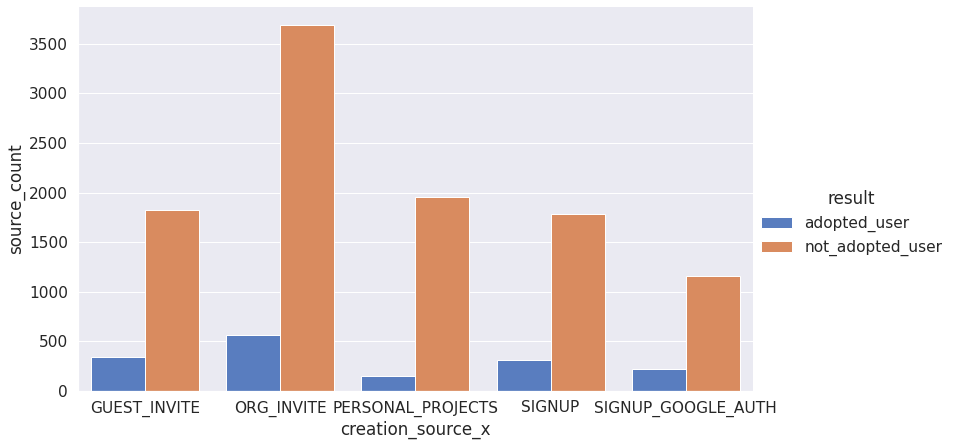

In [ ]:
grp=thg2.groupby(['result','creation_source_x'])['creation_source_x'].count().reset_index(name='source_count')
sns.catplot(x="creation_source_x", y='source_count', hue="result", data=grp, ci=None,
                height=6.5, kind="bar", palette="muted",aspect=1.7)